<a href="https://colab.research.google.com/github/Anastasiyka116/IT-school-Case-Task/blob/main/Task1_3_desigh_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('email_info.csv')
df

,type of mail,date_created,type of action,email domain,email company,design type
0,confirm,2025-01-01,click,hotmail,QuickMail,type 2
1,confirm,2025-01-01,click,hotmail,QuickMail,type 2
2,confirm,2025-01-01,click,hotmail,QuickMail,type 2
3,confirm,2025-01-01,click,hotmail,QuickMail,type 2
4,confirm,2025-01-01,click,hotmail,QuickMail,type 2
...,...,...,...,...,...,...
18457,confirm,2025-03-26,unsubscribe,gmail,JustSends,type 1
18458,confirm,2025-03-26,unsubscribe,gmail,JustSends,type 1
18459,confirm,2025-03-26,unsubscribe,gmail,JustSends,type 1
18460,confirm,2025-03-26,unsubscribe,gmail,JustSends,type 1


In [5]:
size = df.groupby('design type').size()
size

,0
design type,
type 1,9414
type 2,9048


In [6]:
metrics = df.groupby('design type')['type of action'].value_counts()
metrics

design type  type of action
type 1       send              3557
             receive           3369
             open              1217
             click              677
             unsubscribe        594
type 2       send              4148
             receive           1944
             open              1663
             click             1222
             unsubscribe         71
Name: count, dtype: int64

In [7]:
clicks = (
    df[df['type of action'] == 'click']
    .groupby('design type')
    .size()
)
opened = (
    df[df['type of action'] == 'open']
    .groupby('design type')
    .size()
)
ctor = round((clicks/opened)*100,2)
ctor

,0
design type,
type 1,55.63
type 2,73.48


The assumption is correct: Design Type 2 significantly outperforms Type 1 in terms of user engagement. With a CTOR of **73.5%** vs. **55.6%**, Type 2 proves to be more effective in converting readers into active users.

In [8]:
unsubscribe = (
    df[df['type of action'] == 'unsubscribe']
    .groupby('design type')
    .size()
)
received = (
    df[df['type of action'] == 'receive']
    .groupby('design type')
    .size()
)
unsubscribe_rate = round((unsubscribe/received)*100,2)
unsubscribe_rate

,0
design type,
type 1,17.63
type 2,3.65


Furthermore, the significantly lower unsubscribe count for **Type 2** suggests that its layout is not only more engaging but also more user-friendly, making it the preferred choice for future campaigns.

In [9]:
stats = df.groupby('design type')['type of action'].value_counts().unstack().fillna(0)

# Дані для Type 1
n_open1 = int(stats.loc['type 1', 'open'])
n_click1 = int(stats.loc['type 1', 'click'])

# Дані для Type 2
n_open2 = int(stats.loc['type 2', 'open'])
n_click2 = int(stats.loc['type 2', 'click'])

# Створюємо бінарні масиви (1 - клікнув, 0 - тільки відкрив)
# Це база для ресемплінгу
group1 = np.array([1] * n_click1 + [0] * (n_open1 - n_click1))
group2 = np.array([1] * n_click2 + [0] * (n_open2 - n_click2))

In [10]:
boot_diffs = []
np.random.seed(42)
for i in range(1000):
  sample1 = np.random.choice(group1, size=len(group1), replace=True)
  sample2 = np.random.choice(group2, size=len(group2), replace=True)
  # Рахуємо різницю середніх (різницю в CTOR) в цій ітерації
  boot_diffs.append(sample2.mean() - sample1.mean())

boot_diffs = np.array(boot_diffs)

# 4. Розрахунок результатів
obs_diff = group2.mean() - group1.mean()
ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5]) # 95% довірчий інтервал
p_value = np.mean(boot_diffs <= 0) # Ймовірність того, що різниця випадкова
print(f"CTOR Type 1: {group1.mean():.2%}")
print(f"CTOR Type 2: {group2.mean():.2%}")
print(f"Observed Difference: {obs_diff:.2%}")
print(f"95% Confidence Interval: [{ci_low:.2%}, {ci_high:.2%}]")
print(f"P-value: {p_value:.4f}")

CTOR Type 1: 55.63%
CTOR Type 2: 73.48%
Observed Difference: 17.85%
95% Confidence Interval: [14.25%, 21.48%]
P-value: 0.0000


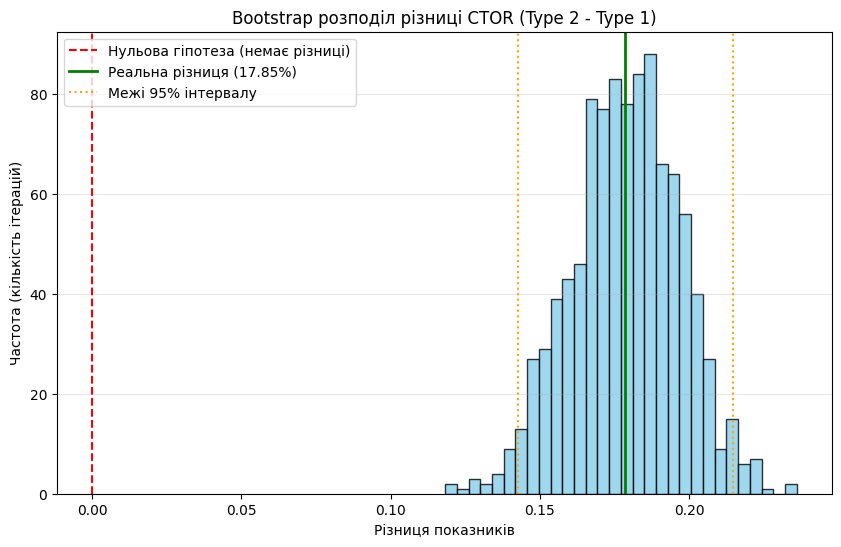

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(boot_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.axvline(0, color='red', linestyle='--', label='Нульова гіпотеза (немає різниці)')
plt.axvline(obs_diff, color='green', linewidth=2, label=f'Реальна різниця ({obs_diff:.2%})')
plt.axvline(ci_low, color='orange', linestyle=':', label='Межі 95% інтервалу')
plt.axvline(ci_high, color='orange', linestyle=':')

plt.title('Bootstrap розподіл різниці CTOR (Type 2 - Type 1)')
plt.xlabel('Різниця показників')
plt.ylabel('Частота (кількість ітерацій)')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

Take a look at this chart: the entire distribution of probable values is located far to the right of the zero mark. This indicates that in 100% of our simulations, **Design Type 2 outperformed Type 1**. The confidence interval does not cross zero, which mathematically confirms that Type 2 delivers a significant uplift in clicks, and this result is not due to chance.